Please select one of route options for your journey
1 = Lowest Cost Path
2 = Shortest Distance Path
3 = Lowest Time Path
4 = Optimal Path
Input = 2


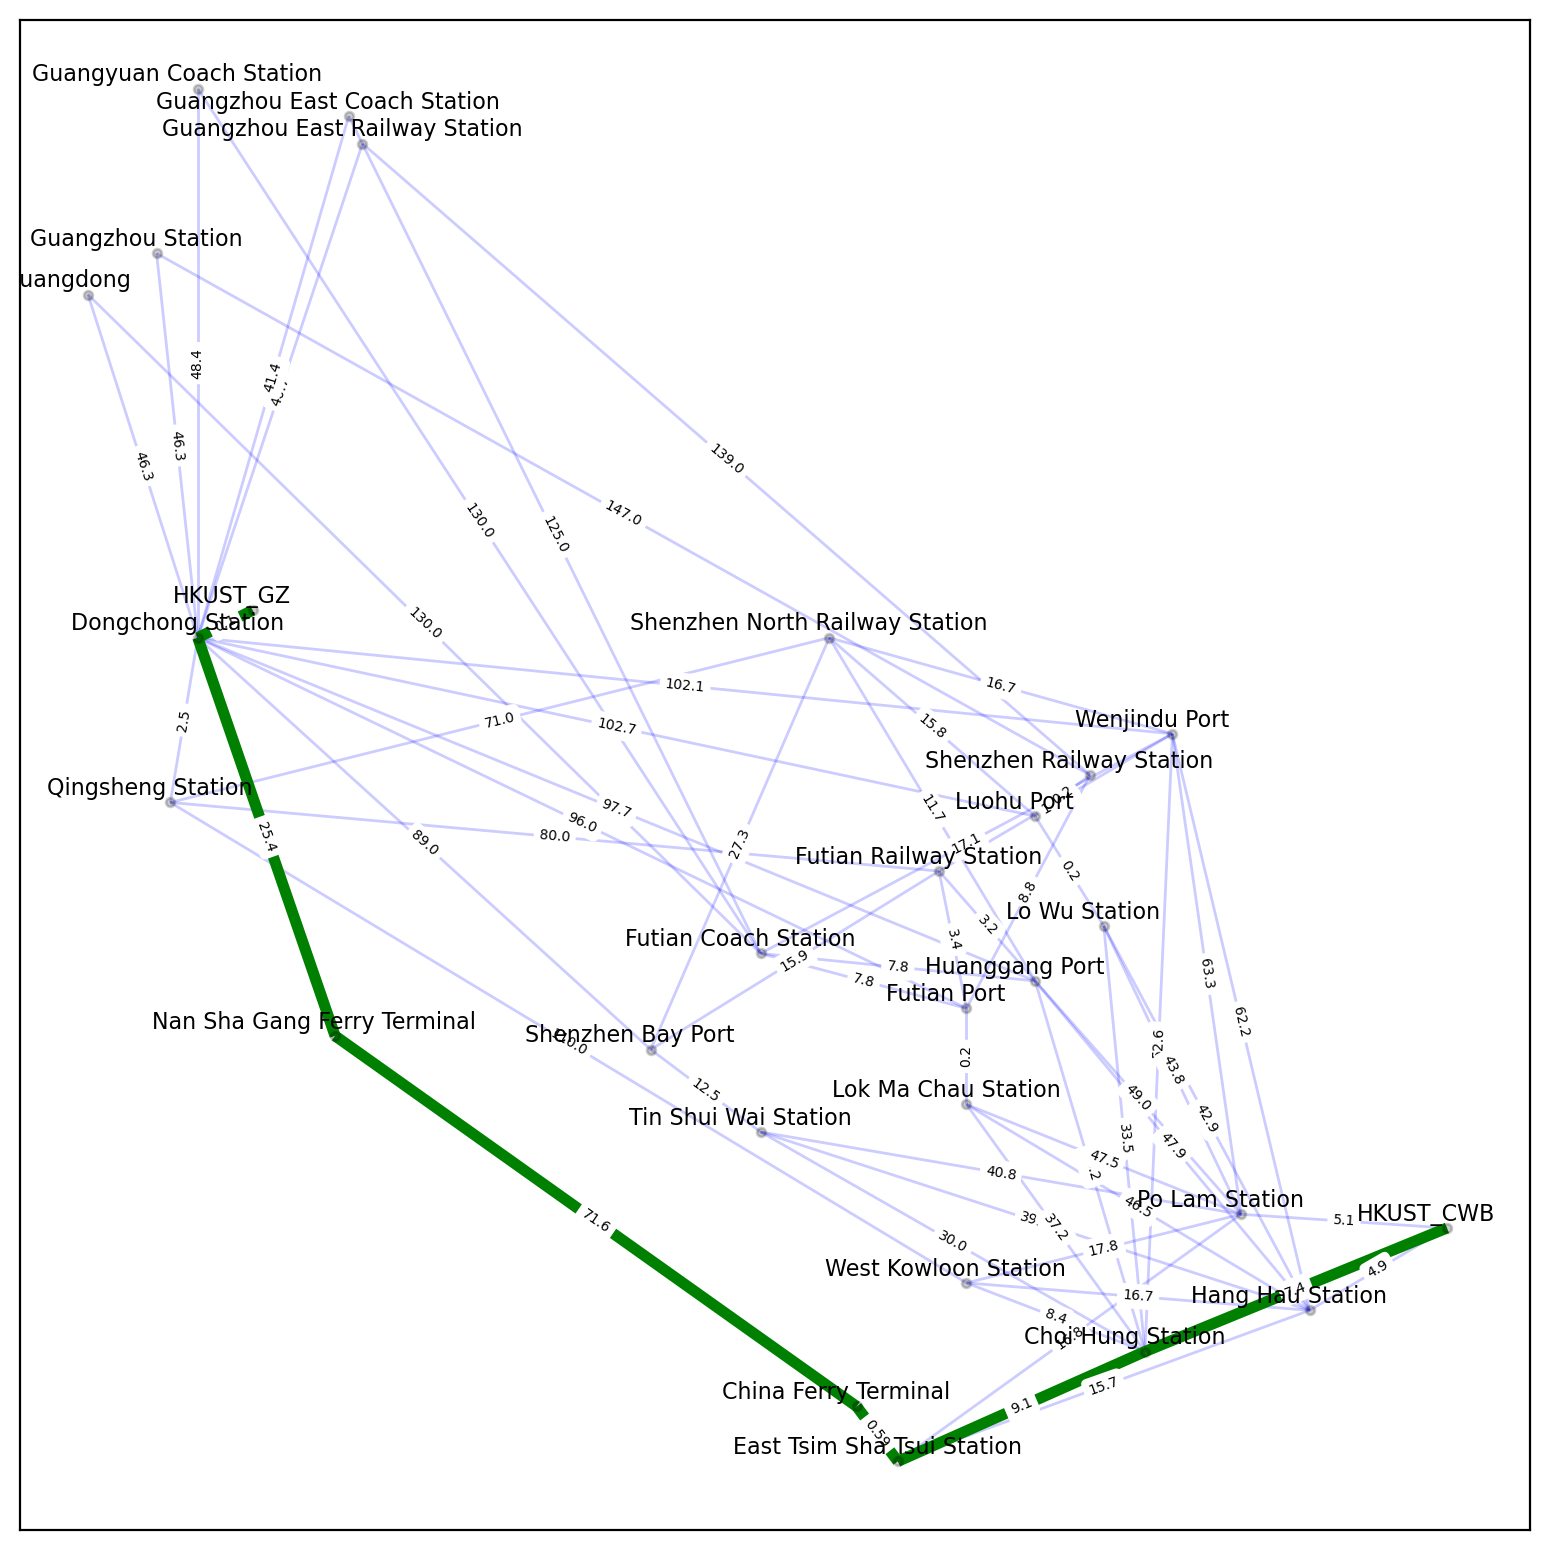

A* path solution:  ['HKUST_CWB', 'Choi Hung Station', 'East Tsim Sha Tsui Station', 'China Ferry Terminal', 'Nan Sha Gang Ferry Terminal', 'Dongchong Station', 'HKUST_GZ']
distance in kms  114.19


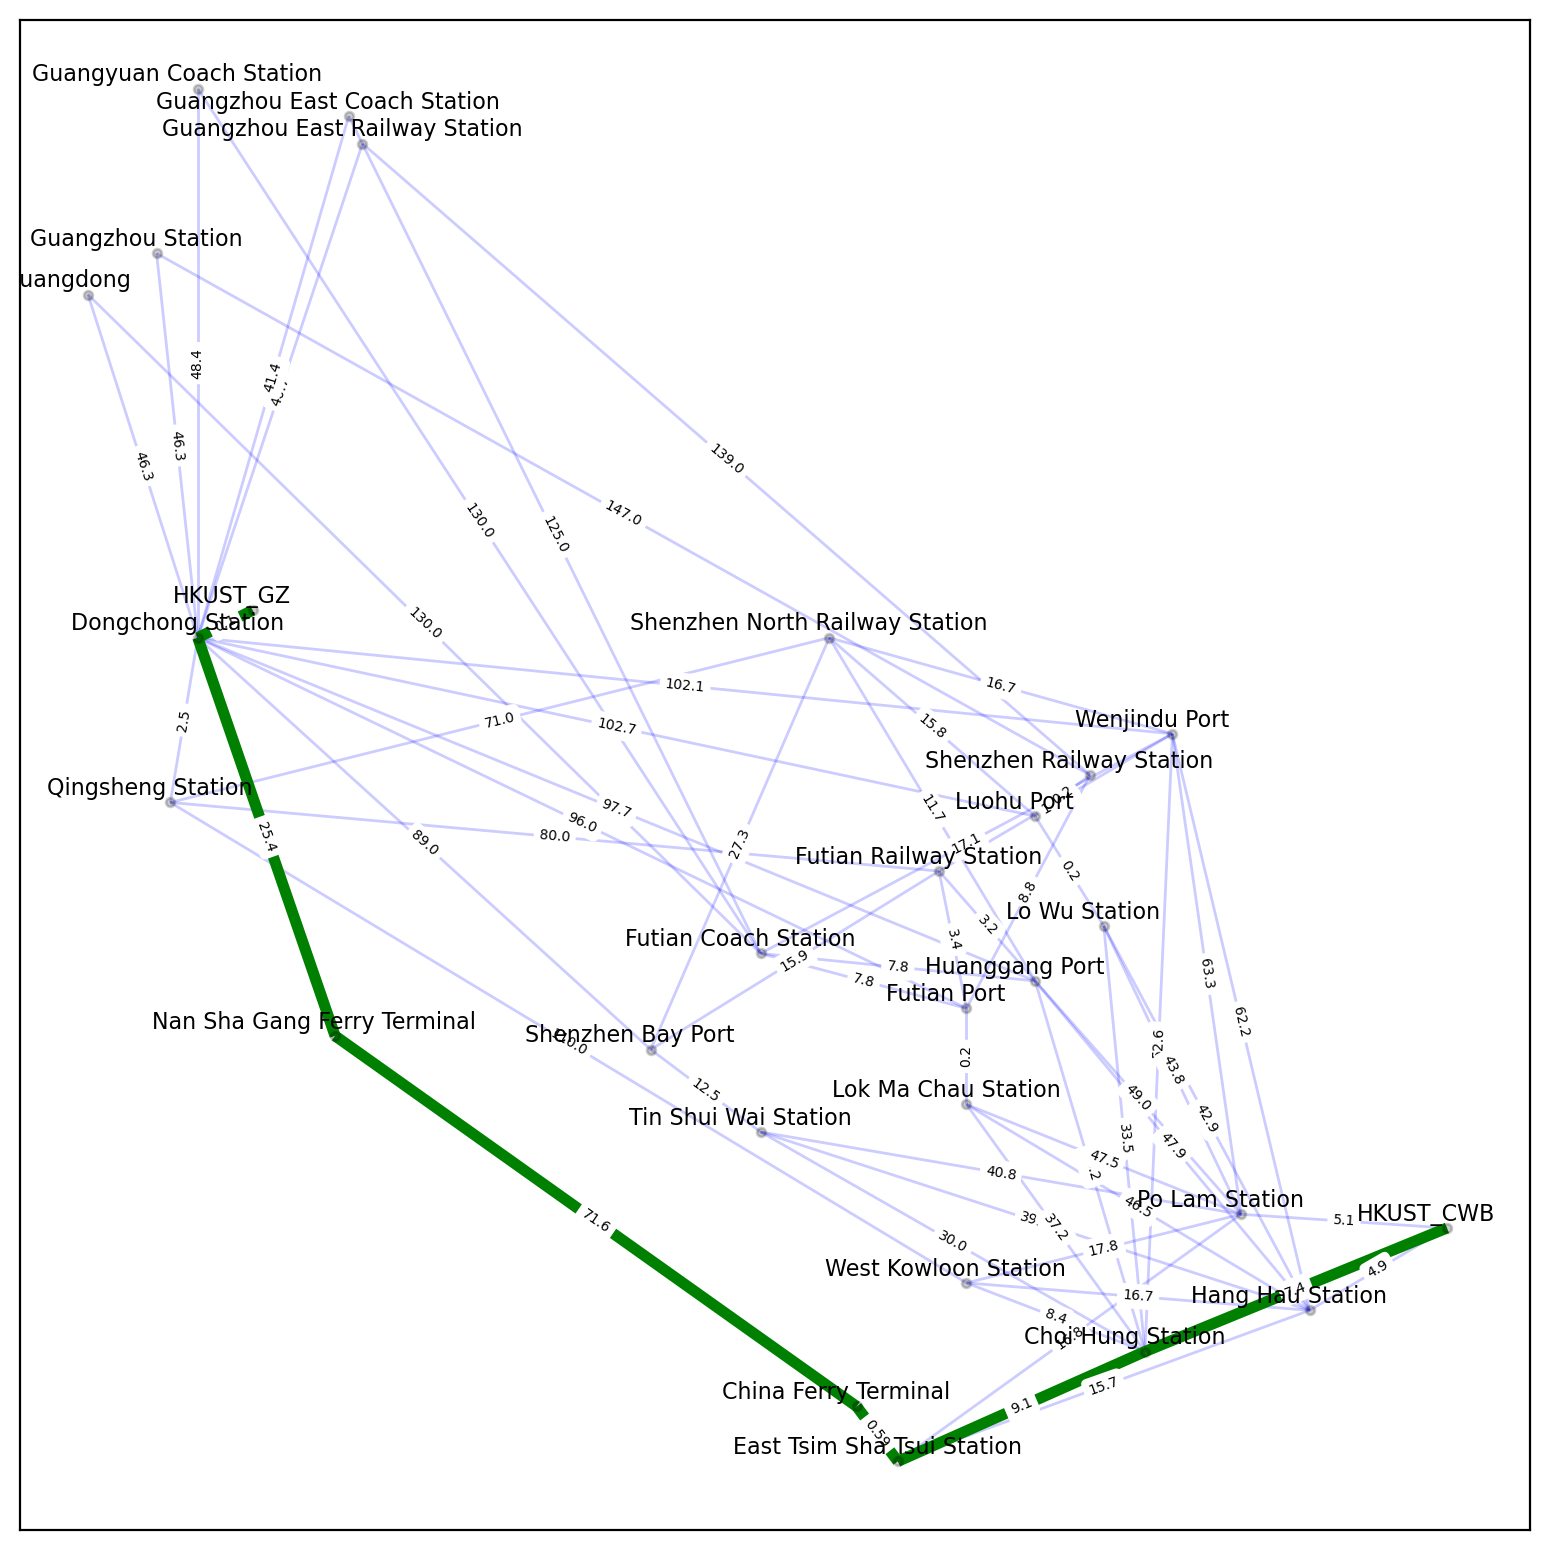

Dijkstra path solution:  ['HKUST_CWB', 'Choi Hung Station', 'East Tsim Sha Tsui Station', 'China Ferry Terminal', 'Nan Sha Gang Ferry Terminal', 'Dongchong Station', 'HKUST_GZ']
distance in kms  114.19


In [6]:
import iimp6010
import pandas as pd
import networkx as nx



print("Please select one of route options for your journey")
print("1 = Lowest Cost Path")
print("2 = Shortest Distance Path")
print("3 = Lowest Time Path")
print("4 = Optimal Path")
user_requirement = input ("Input = ")


if (user_requirement == '1'):
    
    edgelist = pd.read_csv('Cost_new.csv') #assigning cost weight list
    city = iimp6010.load_city(edgelist)
    x ="cost in HKD "
        
if (user_requirement == '2'):
    
    edgelist = pd.read_csv('Distance_new.csv') #assigning distance weight list
    city = iimp6010.load_city(edgelist)
    x ="distance in kms "
    
    def dist(a, b):
        # heuristic distance is the striaghtline map distance from each node to destination(GZ-HKUST)
        A_star_heuristics_list = pd.read_csv('heuristic_list_new.csv')
        for i, element in A_star_heuristics_list.iterrows():
            if  a == element[0]:
                b  = element[1] # assigning the time for straightline distance heuristic
                return b   
    
    
    path2=nx.astar_path(city.graph,'HKUST_CWB','HKUST_GZ', heuristic=dist, weight='weight')
    iimp6010.visualize_path_in_city(city,path2)
    length2 = nx.astar_path_length(city.graph,'HKUST_CWB','HKUST_GZ', heuristic=dist, weight='weight')
      
    print("A* path solution: ",path2)
    print(x,length2)
            
if (user_requirement == '3'):
    
    edgelist = pd.read_csv('Time_new.csv') #assigning time weight list
    city = iimp6010.load_city(edgelist)
    #iimp6010.visualize_city(city)
    x ="time in minutes "
    
    def dist(a, b):
        # heuristic for time is the calculation of (straightline distance/ high speed train speed) *60 (to get answer in mins)
        A_star_heuristics_list = pd.read_csv('heuristic_list_new.csv')
        for i, element in A_star_heuristics_list.iterrows():
            if  a == element[0]:
                b  = element[2] # assigning the straightline distance heuristic
                return b
            
    
    path2=nx.astar_path(city.graph,'HKUST_CWB','HKUST_GZ', heuristic=dist, weight='weight')
    iimp6010.visualize_path_in_city(city,path2)
    length2 = nx.astar_path_length(city.graph,'HKUST_CWB','HKUST_GZ', heuristic=dist, weight='weight')
    
    
    print("A* path solution: ",path2)
    print(x,length2)

if (user_requirement == '4'):
    
    #Now the optimal path based on Weighted Sum Method (WSM) calculation begins.
    #WSM weights were decided based on the survey result for student's optimal path choices
    
    edgelist = pd.read_csv('WSM_new.csv')  #assigning WSM weight list
    city = iimp6010.load_city(edgelist)
    
    x=""
    
    def dist(a, b):
        A_star_heuristics_list = pd.read_csv('heuristic_list_new.csv')
        for i, element in A_star_heuristics_list.iterrows():
            if  a == element[0]:
                b  = element[3] # assigning the WSM heuristic derived by straightline distances and speed values
                return b   
    
    
    path2=nx.astar_path(city.graph,'HKUST_CWB','HKUST_GZ', heuristic=dist, weight='weight')
    iimp6010.visualize_path_in_city(city,path2)
    length2 = nx.astar_path_length(city.graph,'HKUST_CWB','HKUST_GZ', heuristic=dist, weight='weight')
    
    print("A* path solution: ",path2)
    print(x,length2)


path1 = nx.dijkstra_path(city.graph,'HKUST_CWB','HKUST_GZ')
length1 = nx.dijkstra_path_length(city.graph,'HKUST_CWB','HKUST_GZ', weight='weight')
iimp6010.visualize_path_in_city(city,path1)

print("Dijkstra path solution: ",path1)
print(x,length1)

